In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm


In [87]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

In [88]:
epochs = 50
batch_size = 16
learning_rate = 0.003


In [89]:
# https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)


In [90]:
train_dataset = datasets.CIFAR10(
    root='data/', train=True, download=True, transform=transform)
train_loader = data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(
    root='data', train=False, download=True, transform=transform)
test_loader = data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [91]:
classes = ['car', 'plane', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(len(train_loader))
print(len(test_loader))


3125
625


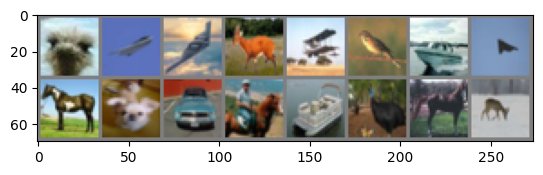

torch.Size([16, 3, 32, 32])
After conv1:  torch.Size([16, 6, 28, 28])
After pool1:  torch.Size([16, 6, 14, 14])
After conv2:  torch.Size([16, 16, 10, 10])
After pool2:  torch.Size([16, 16, 5, 5])


In [92]:
# test

def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()


data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

x = conv1(images)
print("After conv1: ", x.shape)

x = pool(x)
print("After pool1: ", x.shape)

x = conv2(x)
print("After conv2: ", x.shape)

x = pool(x)
print("After pool2: ", x.shape)


In [93]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)  # flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [94]:
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


  2%|▏         | 1/50 [00:13<10:42, 13.11s/it]

Epoch: 1 Loss: 2.2313919067382812


  4%|▍         | 2/50 [00:27<10:51, 13.58s/it]

Epoch: 2 Loss: 1.6966782808303833


  6%|▌         | 3/50 [00:38<10:02, 12.83s/it]

Epoch: 3 Loss: 1.593859076499939


  8%|▊         | 4/50 [00:48<08:46, 11.44s/it]

Epoch: 4 Loss: 1.3211798667907715


 10%|█         | 5/50 [01:00<08:50, 11.78s/it]

Epoch: 5 Loss: 1.5601009130477905


 12%|█▏        | 6/50 [01:11<08:27, 11.53s/it]

Epoch: 6 Loss: 1.1215323209762573


 14%|█▍        | 7/50 [01:26<08:55, 12.46s/it]

Epoch: 7 Loss: 1.2146955728530884


 16%|█▌        | 8/50 [01:39<08:57, 12.79s/it]

Epoch: 8 Loss: 1.558516502380371


 18%|█▊        | 9/50 [01:53<09:00, 13.17s/it]

Epoch: 9 Loss: 1.403273582458496


 20%|██        | 10/50 [02:08<09:07, 13.69s/it]

Epoch: 10 Loss: 1.0499063730239868


 22%|██▏       | 11/50 [02:22<08:57, 13.79s/it]

Epoch: 11 Loss: 0.8741630911827087


 24%|██▍       | 12/50 [02:36<08:51, 13.98s/it]

Epoch: 12 Loss: 0.8275446891784668


 26%|██▌       | 13/50 [02:52<08:56, 14.50s/it]

Epoch: 13 Loss: 1.1631150245666504


 28%|██▊       | 14/50 [03:08<08:52, 14.80s/it]

Epoch: 14 Loss: 1.2359782457351685


 30%|███       | 15/50 [03:21<08:28, 14.52s/it]

Epoch: 15 Loss: 1.0122249126434326


 32%|███▏      | 16/50 [03:35<08:04, 14.26s/it]

Epoch: 16 Loss: 1.6228551864624023


 34%|███▍      | 17/50 [04:03<10:04, 18.30s/it]

Epoch: 17 Loss: 0.6825005412101746


 36%|███▌      | 18/50 [04:36<12:08, 22.78s/it]

Epoch: 18 Loss: 0.8992648720741272


 38%|███▊      | 19/50 [05:09<13:20, 25.82s/it]

Epoch: 19 Loss: 0.3737805485725403


 40%|████      | 20/50 [05:29<12:03, 24.13s/it]

Epoch: 20 Loss: 0.7876145839691162


 42%|████▏     | 21/50 [05:43<10:09, 21.01s/it]

Epoch: 21 Loss: 1.2402374744415283


 44%|████▍     | 22/50 [05:56<08:43, 18.70s/it]

Epoch: 22 Loss: 1.045717477798462


 46%|████▌     | 23/50 [06:11<07:56, 17.66s/it]

Epoch: 23 Loss: 0.49598991870880127


 48%|████▊     | 24/50 [06:46<09:48, 22.64s/it]

Epoch: 24 Loss: 0.9050911068916321


 50%|█████     | 25/50 [07:04<08:57, 21.50s/it]

Epoch: 25 Loss: 1.6090233325958252


 52%|█████▏    | 26/50 [07:19<07:48, 19.52s/it]

Epoch: 26 Loss: 0.8511242866516113


 54%|█████▍    | 27/50 [07:33<06:46, 17.69s/it]

Epoch: 27 Loss: 0.8857630491256714


 56%|█████▌    | 28/50 [07:48<06:12, 16.92s/it]

Epoch: 28 Loss: 0.7808228731155396


 58%|█████▊    | 29/50 [08:02<05:36, 16.05s/it]

Epoch: 29 Loss: 0.9348776936531067


 60%|██████    | 30/50 [08:16<05:10, 15.52s/it]

Epoch: 30 Loss: 0.8167471885681152


 62%|██████▏   | 31/50 [08:30<04:42, 14.85s/it]

Epoch: 31 Loss: 0.9476438164710999


 64%|██████▍   | 32/50 [08:44<04:27, 14.87s/it]

Epoch: 32 Loss: 0.8099594712257385


 66%|██████▌   | 33/50 [08:58<04:06, 14.50s/it]

Epoch: 33 Loss: 1.3018585443496704


 68%|██████▊   | 34/50 [09:13<03:54, 14.67s/it]

Epoch: 34 Loss: 1.1641441583633423


 70%|███████   | 35/50 [09:27<03:37, 14.53s/it]

Epoch: 35 Loss: 0.31131720542907715


 72%|███████▏  | 36/50 [09:43<03:27, 14.84s/it]

Epoch: 36 Loss: 1.0621517896652222


 74%|███████▍  | 37/50 [09:58<03:14, 14.96s/it]

Epoch: 37 Loss: 0.455628901720047


 76%|███████▌  | 38/50 [10:13<02:59, 14.98s/it]

Epoch: 38 Loss: 0.4793601632118225


 78%|███████▊  | 39/50 [10:26<02:36, 14.26s/it]

Epoch: 39 Loss: 0.9773595333099365


 80%|████████  | 40/50 [10:40<02:22, 14.29s/it]

Epoch: 40 Loss: 0.3495960533618927


 82%|████████▏ | 41/50 [10:55<02:08, 14.33s/it]

Epoch: 41 Loss: 0.659113883972168


 84%|████████▍ | 42/50 [11:09<01:54, 14.33s/it]

Epoch: 42 Loss: 0.8538417220115662


 86%|████████▌ | 43/50 [11:32<01:59, 17.08s/it]

Epoch: 43 Loss: 0.7322015166282654


 88%|████████▊ | 44/50 [11:46<01:35, 15.93s/it]

Epoch: 44 Loss: 1.0909442901611328


 90%|█████████ | 45/50 [12:02<01:19, 15.93s/it]

Epoch: 45 Loss: 0.6805593371391296


 92%|█████████▏| 46/50 [12:16<01:02, 15.57s/it]

Epoch: 46 Loss: 0.7167466878890991


 94%|█████████▍| 47/50 [12:32<00:46, 15.48s/it]

Epoch: 47 Loss: 0.5250929594039917


 96%|█████████▌| 48/50 [12:47<00:30, 15.39s/it]

Epoch: 48 Loss: 0.40964803099632263


 98%|█████████▊| 49/50 [13:01<00:14, 15.00s/it]

Epoch: 49 Loss: 0.45232057571411133


100%|██████████| 50/50 [13:14<00:00, 15.89s/it]

Epoch: 50 Loss: 0.5046854615211487


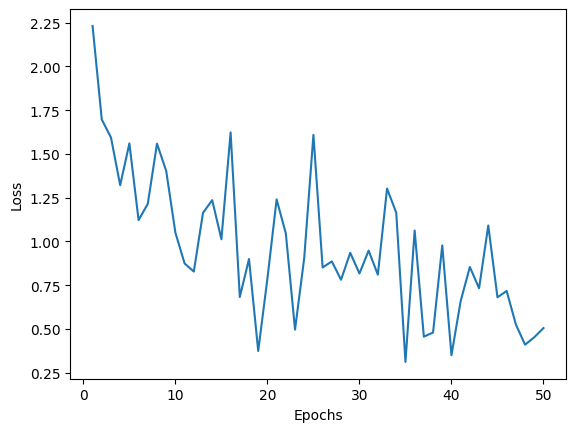

In [95]:
losses = []
epochs_lst = [i+1 for i in range(epochs)]

for epoch in tqdm(range(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if (i + 1) % 1000 == 0:
        # print("Epoch: ", epoch+1, "Step: ", i+1, "Loss: ", loss)
    print("Epoch:", epoch+1, "Loss:", loss.item())
    losses.append(float(loss))

MODEL_PATH = './cnn.mdl'
torch.save(model.state_dict(), MODEL_PATH)

plt.plot(epochs_lst, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [96]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print("Accuracy: ", acc)

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy:  64.12
Accuracy of car: 69.2 %
Accuracy of plane: 74.8 %
Accuracy of bird: 52.0 %
Accuracy of cat: 50.0 %
Accuracy of deer: 60.6 %
Accuracy of dog: 46.8 %
Accuracy of frog: 69.8 %
Accuracy of horse: 66.6 %
Accuracy of ship: 80.8 %
Accuracy of truck: 70.6 %
